## Problem Statement


A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

## About Dataset


You are provided with the leads data of last year containing both direct and indirect leads. Each lead provides information about their activity on the platform, signup information and campaign information. Based on his past activity on the platform, you need to build the predictive model to classify if the user would buy the product in the next 3 months or not.

## Training set


train.csv contains the leads information of last 1 year from Jan 2021 to Dec 2021. And also the target variable indicating if the user will buy the product in next 3 months or not 



* Variable _______________________________Description

* id - Unique identifier of a lead

* created_at - Date of lead dropped

* signup_date - Sign up date of the user on the website

* campaign_var (1 and 2) - campaign information of the lead

* products_purchased - No. of past products purchased at the time of dropping the lead

* user_activity_var (1 to 12) - Derived activities of the user on the website

* buy - 0 or 1 indicating if the user will buy the product in next 3 months or not 

## Evaluation metric


The evaluation metric for this hackathon would be F1 Score of Class 1.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Load Train data
df_train=pd.read_csv('train_wn75k28.csv')

In [3]:
pd.options.display.max_columns= None

In [4]:
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
df_train.tail()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
# Load Test data

df_test=pd.read_csv('test_Wf7sxXF.csv')

In [7]:
df_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.tail()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
13179,52341,2022-03-30,16,12,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0
13182,52344,2022-03-30,14,10,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0
13183,52345,2022-03-30,13,13,NaN,NaN,0,0,0,0,0,1,1,1,0,0,1,0


In [9]:
# Checking size of train and test data.

print('Size of train : ',df_train.shape)
print('Size of test : ', df_test.shape)

Size of train :  (39161, 19)
Size of test :  (13184, 18)


In [10]:
# Info of train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [11]:
# # Renaming the columns, Rename Target columns to default

# df_train.rename(columns={'Yearly Income':'Yearly_Income','Home Status':'Home_Status','Unpaid 2 years':'Unpaid_2_years','Debt to Income':'Debt_to_Income_Ratio','File Status':'File_Status','Claim Type':'Claim_Type','Loan/No Loan':'Default','Already Defaulted':'Already_Defaulted','Postal Code':'Postal_Code','Lend Amount':'Lend_Amount','Deprecatory Records':'Deprecatory_Records','Interest Charged':'Interest_Charged','Usage Rate':'Usage_Rate','Present Balance':'Present_Balance','Gross Collection':'Gross_Collection','Sub GGGrade':'Sub_GGGrade','Account Open':'Account_Open','Total Unpaid CL':'Total_Unpaid_CL','Unpaid Amount':'Unpaid_Amount','Due Fee':'Due_Fee'},inplace= True)

In [12]:
df_train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [13]:
# 
df_train['buy'].value_counts(normalize=True)

0    0.94898
1    0.05102
Name: buy, dtype: float64

* There are 19 variable and 39161 records in train data
* As Buy/ No buy tagret variable there are almost 5:95 class ratio

In [14]:
# Info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

* There are 18 variable and 13184 records in test data

In [15]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39161.0,19581.000000,11304.951283,1.0,9791.0,19581.0,29371.0,39161.0
campaign_var_1,39161.0,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,1.0,3.0


In [16]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13184.0,45753.500000,3806.037309,39162.0,42457.75,45753.5,49049.25,52345.0
campaign_var_1,13184.0,7.724439,3.599981,1.0,5.00,8.0,10.00,16.0
campaign_var_2,13184.0,7.943416,2.687832,1.0,6.00,8.0,10.00,15.0
products_purchased,5048.0,2.108954,0.783483,1.0,2.00,2.0,3.00,4.0
user_activity_var_1,13184.0,0.386681,0.505653,0.0,0.00,0.0,1.00,3.0
user_activity_var_2,13184.0,0.004248,0.065037,0.0,0.00,0.0,0.00,1.0
user_activity_var_3,13184.0,0.103307,0.304371,0.0,0.00,0.0,0.00,1.0
user_activity_var_4,13184.0,0.007130,0.084140,0.0,0.00,0.0,0.00,1.0
user_activity_var_5,13184.0,0.153064,0.360695,0.0,0.00,0.0,0.00,2.0
user_activity_var_6,13184.0,0.525485,0.565208,0.0,0.00,0.0,1.00,3.0


In [17]:
#  Checking missing value in train
df_train.isnull().sum().sort_values(ascending=False)

products_purchased      20911
signup_date             15113
id                          0
user_activity_var_6         0
user_activity_var_12        0
user_activity_var_11        0
user_activity_var_10        0
user_activity_var_9         0
user_activity_var_8         0
user_activity_var_7         0
user_activity_var_4         0
user_activity_var_5         0
created_at                  0
user_activity_var_3         0
user_activity_var_2         0
user_activity_var_1         0
campaign_var_2              0
campaign_var_1              0
buy                         0
dtype: int64

In [18]:
#  Checking missing value in test
df_test.isnull().sum().sort_values(ascending=False)

products_purchased      8136
signup_date             6649
id                         0
user_activity_var_5        0
user_activity_var_11       0
user_activity_var_10       0
user_activity_var_9        0
user_activity_var_8        0
user_activity_var_7        0
user_activity_var_6        0
user_activity_var_4        0
created_at                 0
user_activity_var_3        0
user_activity_var_2        0
user_activity_var_1        0
campaign_var_2             0
campaign_var_1             0
user_activity_var_12       0
dtype: int64

* Missing values in two feature products_purchased  signup_date 

In [19]:
#  Checking duplicated value in train set
df_train.duplicated().sum()

0

In [20]:
#  Checking duplicated value in train set
df_test.duplicated().sum()

0

In [21]:
# Total % missing values by features Train

percent_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
percent_missing.sort_values(ascending=False)

products_purchased      53.397513
signup_date             38.591966
id                       0.000000
user_activity_var_6      0.000000
user_activity_var_12     0.000000
user_activity_var_11     0.000000
user_activity_var_10     0.000000
user_activity_var_9      0.000000
user_activity_var_8      0.000000
user_activity_var_7      0.000000
user_activity_var_4      0.000000
user_activity_var_5      0.000000
created_at               0.000000
user_activity_var_3      0.000000
user_activity_var_2      0.000000
user_activity_var_1      0.000000
campaign_var_2           0.000000
campaign_var_1           0.000000
buy                      0.000000
dtype: float64

In [22]:
# Total % missing values by features Test

percent_missing = df_test.isnull().sum() * 100 / df_test.shape[0]
percent_missing.sort_values(ascending=False)

products_purchased      61.711165
signup_date             50.432342
id                       0.000000
user_activity_var_5      0.000000
user_activity_var_11     0.000000
user_activity_var_10     0.000000
user_activity_var_9      0.000000
user_activity_var_8      0.000000
user_activity_var_7      0.000000
user_activity_var_6      0.000000
user_activity_var_4      0.000000
created_at               0.000000
user_activity_var_3      0.000000
user_activity_var_2      0.000000
user_activity_var_1      0.000000
campaign_var_2           0.000000
campaign_var_1           0.000000
user_activity_var_12     0.000000
dtype: float64

In [23]:
#  Combine train and test data into single dataframe
df=pd.concat([df_train,df_test],axis=0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52345 non-null  int64  
 1   created_at            52345 non-null  object 
 2   campaign_var_1        52345 non-null  int64  
 3   campaign_var_2        52345 non-null  int64  
 4   products_purchased    23298 non-null  float64
 5   signup_date           30583 non-null  object 
 6   user_activity_var_1   52345 non-null  int64  
 7   user_activity_var_2   52345 non-null  int64  
 8   user_activity_var_3   52345 non-null  int64  
 9   user_activity_var_4   52345 non-null  int64  
 10  user_activity_var_5   52345 non-null  int64  
 11  user_activity_var_6   52345 non-null  int64  
 12  user_activity_var_7   52345 non-null  int64  
 13  user_activity_var_8   52345 non-null  int64  
 14  user_activity_var_9   52345 non-null  int64  
 15  user_activity_var_1

In [25]:
#created_at and signup_date are date formate datatype we need to convert it into datetime64
df["created_at"] = df["created_at"].astype("datetime64")
df["signup_date"] = df["signup_date"].astype("datetime64")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    52345 non-null  int64         
 1   created_at            52345 non-null  datetime64[ns]
 2   campaign_var_1        52345 non-null  int64         
 3   campaign_var_2        52345 non-null  int64         
 4   products_purchased    23298 non-null  float64       
 5   signup_date           30583 non-null  datetime64[ns]
 6   user_activity_var_1   52345 non-null  int64         
 7   user_activity_var_2   52345 non-null  int64         
 8   user_activity_var_3   52345 non-null  int64         
 9   user_activity_var_4   52345 non-null  int64         
 10  user_activity_var_5   52345 non-null  int64         
 11  user_activity_var_6   52345 non-null  int64         
 12  user_activity_var_7   52345 non-null  int64         
 13  user_activity_va

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,52345.0,26173.000000,15110.844257,1.0,13087.0,26173.0,39259.0,52345.0
campaign_var_1,52345.0,6.826211,3.543873,1.0,4.0,6.0,9.0,16.0
campaign_var_2,52345.0,6.828198,2.711333,1.0,5.0,7.0,9.0,15.0
products_purchased,23298.0,2.144347,0.780816,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,52345.0,0.396714,0.508333,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,52345.0,0.006094,0.077828,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,52345.0,0.102952,0.303899,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,52345.0,0.010373,0.101322,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,52345.0,0.151896,0.359933,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,52345.0,0.506295,0.560053,0.0,0.0,0.0,1.0,3.0


In [28]:
#  Checking unique values in every column columns 
for column in df.columns:
    print(column)
    print(df[column].nunique())
    print(df[column].value_counts().sort_values(ascending=False))
    
    print('='*50)

id
52345
1        1
11       1
25       1
24       1
3        1
        ..
52339    1
52340    1
52341    1
52342    1
52345    1
Name: id, Length: 52345, dtype: int64
created_at
454
2021-12-26    181
2021-12-09    180
2021-12-07    179
2021-12-21    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 454, dtype: int64
campaign_var_1
16
6     5320
5     5239
4     5086
7     5060
8     4714
3     4644
2     4151
9     4026
10    3419
11    2794
12    2163
1     1820
13    1627
14    1154
15     796
16     332
Name: campaign_var_1, dtype: int64
campaign_var_2
15
7     7247
6     7221
8     6613
5     6360
9     5219
4     4996
10    3779
3     3293
11    2423
2     1973
12    1459
13     730
1      622
14     330
15      80
Name: campaign_var_2, dtype: int64
products_purchased
4
2.0    11351
3.0     6284
1.0     4749
4.0      914
Name: products_purchased, dtype: int64
signup_date
1819

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























count    23298.000000
mean         2.144347
std          0.780816
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: products_purchased, dtype: float64


<AxesSubplot:xlabel='products_purchased'>

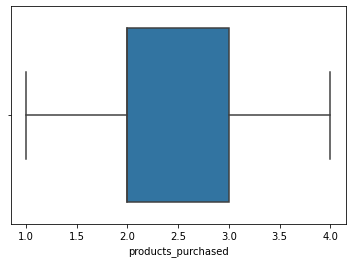

In [29]:
# For yearly income Train data
print(df['products_purchased'].describe())
sns.boxplot(df['products_purchased'])

In [30]:
df.products_purchased.value_counts()

2.0    11351
3.0     6284
1.0     4749
4.0      914
Name: products_purchased, dtype: int64

* We can think like that the missing values in product purchase may be that person not purchase any product  we can set 0 for missing values in purchase for initial analysis

In [31]:
# Lets make copy of original dataframe
df1=df.copy()

In [32]:
df1['products_purchased'].replace(np.nan,value= 0 ,inplace=True)

In [33]:
#Lets Extract year from signup date
df1["signup_Year"] = df1["signup_date"].dt.strftime('%Y')

In [34]:
# df1["signup_Month"] = df1["signup_date"].dt.strftime('%m')

In [35]:
df1.signup_Year.unique()

array(['2020', '2021', '2017', '2019', '2018', nan, '2022', '2016',
       '2015'], dtype=object)

In [36]:
# Lets Repalce all missing and nan value with 0
df1['signup_Year'].replace(np.nan,value= 0 ,inplace=True)

In [37]:
df1.signup_Year.value_counts()

0       21762
2021    12364
2020     8776
2019     4246
2022     3312
2018     1462
2017      343
2016       66
2015       14
Name: signup_Year, dtype: int64

In [38]:
mapdict = {2022:1, 2021:2, 2020:3, 2019:4, 2018:5, 2017:6, 2016:7, 2015:8}
df1['signup_Year'] = df1['signup_Year'].map({'2022':1, '2021':2, '2020':3, '2019':4, '2018':5, '2017':6, '2016':7, '2015':8,0:0})
df1['signup_Year'].value_counts()

0    21762
2    12364
3     8776
4     4246
1     3312
5     1462
6      343
7       66
8       14
Name: signup_Year, dtype: int64

In [39]:
# recheck for null values
df1.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date             21762
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                     13184
signup_Year                 0
dtype: int64

In [40]:
# EDA purpose we can drop ID but can save all id in the ID object name
ID = df1['id']

In [41]:
#Lets drop id and sinup_date 
df1= df1.drop(['id','signup_date'],axis=1)

In [42]:
df1= df1.drop(['created_at'],axis=1)

In [43]:
buy= df1['buy']

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        52345 non-null  int64  
 1   campaign_var_2        52345 non-null  int64  
 2   products_purchased    52345 non-null  float64
 3   user_activity_var_1   52345 non-null  int64  
 4   user_activity_var_2   52345 non-null  int64  
 5   user_activity_var_3   52345 non-null  int64  
 6   user_activity_var_4   52345 non-null  int64  
 7   user_activity_var_5   52345 non-null  int64  
 8   user_activity_var_6   52345 non-null  int64  
 9   user_activity_var_7   52345 non-null  int64  
 10  user_activity_var_8   52345 non-null  int64  
 11  user_activity_var_9   52345 non-null  int64  
 12  user_activity_var_10  52345 non-null  int64  
 13  user_activity_var_11  52345 non-null  int64  
 14  user_activity_var_12  52345 non-null  int64  
 15  buy                

In [45]:
df1.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'signup_Year'],
      dtype='object')

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























### Univariate Analysis 

### Bivariate Analysis With respect to target variable

## Insignts and Observations






## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction

#### one hot encoding for catagorical variable 

In [46]:
# one hot encoding for catagorical variable

# list_dummy=['products_purchased','user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3','user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6','user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_11','signup_Year']

# df1_dummy=pd.get_dummies(df1,columns=list_dummy,drop_first=True)

In [47]:
# df1_dummy.info()

In [48]:
# # Lable Encoding for catagorical variable
# for feature in df1.columns: 
#     if df1[feature].astype == 'object':
#         df1[feature] = pd.Categorical(df1[feature]).codes

In [49]:
df1['signup_Year'] = pd.Categorical(df1['signup_Year']).codes
df1['signup_Year']

0        3
1        3
2        2
3        6
4        3
        ..
13179    0
13180    1
13181    2
13182    0
13183    0
Name: signup_Year, Length: 52345, dtype: int8

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        52345 non-null  int64  
 1   campaign_var_2        52345 non-null  int64  
 2   products_purchased    52345 non-null  float64
 3   user_activity_var_1   52345 non-null  int64  
 4   user_activity_var_2   52345 non-null  int64  
 5   user_activity_var_3   52345 non-null  int64  
 6   user_activity_var_4   52345 non-null  int64  
 7   user_activity_var_5   52345 non-null  int64  
 8   user_activity_var_6   52345 non-null  int64  
 9   user_activity_var_7   52345 non-null  int64  
 10  user_activity_var_8   52345 non-null  int64  
 11  user_activity_var_9   52345 non-null  int64  
 12  user_activity_var_10  52345 non-null  int64  
 13  user_activity_var_11  52345 non-null  int64  
 14  user_activity_var_12  52345 non-null  int64  
 15  buy                

In [51]:
df1['buy'].value_counts()

0.0    37163
1.0     1998
Name: buy, dtype: int64

In [52]:
# Seperate the train and test data.
mask=df1['buy'] >= 0

In [53]:
data_train=df1[mask]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_2   39161 non-null  int64  
 5   user_activity_var_3   39161 non-null  int64  
 6   user_activity_var_4   39161 non-null  int64  
 7   user_activity_var_5   39161 non-null  int64  
 8   user_activity_var_6   39161 non-null  int64  
 9   user_activity_var_7   39161 non-null  int64  
 10  user_activity_var_8   39161 non-null  int64  
 11  user_activity_var_9   39161 non-null  int64  
 12  user_activity_var_10  39161 non-null  int64  
 13  user_activity_var_11  39161 non-null  int64  
 14  user_activity_var_12  39161 non-null  int64  
 15  buy                

In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_2   39161 non-null  int64  
 5   user_activity_var_3   39161 non-null  int64  
 6   user_activity_var_4   39161 non-null  int64  
 7   user_activity_var_5   39161 non-null  int64  
 8   user_activity_var_6   39161 non-null  int64  
 9   user_activity_var_7   39161 non-null  int64  
 10  user_activity_var_8   39161 non-null  int64  
 11  user_activity_var_9   39161 non-null  int64  
 12  user_activity_var_10  39161 non-null  int64  
 13  user_activity_var_11  39161 non-null  int64  
 14  user_activity_var_12  39161 non-null  int64  
 15  buy                

In [55]:
# Test data
data_test=df1[~mask]

In [56]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        13184 non-null  int64  
 1   campaign_var_2        13184 non-null  int64  
 2   products_purchased    13184 non-null  float64
 3   user_activity_var_1   13184 non-null  int64  
 4   user_activity_var_2   13184 non-null  int64  
 5   user_activity_var_3   13184 non-null  int64  
 6   user_activity_var_4   13184 non-null  int64  
 7   user_activity_var_5   13184 non-null  int64  
 8   user_activity_var_6   13184 non-null  int64  
 9   user_activity_var_7   13184 non-null  int64  
 10  user_activity_var_8   13184 non-null  int64  
 11  user_activity_var_9   13184 non-null  int64  
 12  user_activity_var_10  13184 non-null  int64  
 13  user_activity_var_11  13184 non-null  int64  
 14  user_activity_var_12  13184 non-null  int64  
 15  buy                

## Checking the multocoliniearity

In [57]:
import statsmodels.formula.api as SM

In [58]:
# VIF score check function
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    c_vars = input_data
    cvar_names = input_data.columns
    for i in range(len(cvar_names)):
        d = c_vars[cvar_names[i]] 
        c = c_vars[cvar_names.drop(cvar_names[i])]
        rsq = SM.ols(formula="d~c", data=c_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (cvar_names[i], " VIF = " , vif)

In [59]:
# # VIF check for multicoliniearity
# vif_cal(input_data=data_train.drop('Default',axis=1))

In [60]:
# data_train=data_train.drop(['created_at'],axis=1)

In [61]:
# data_test=data_test.drop(['created_at' ],axis=1)

*By taking threshould of 2 we can say  now feature which are do not have multicoliniearity 

In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_2   39161 non-null  int64  
 5   user_activity_var_3   39161 non-null  int64  
 6   user_activity_var_4   39161 non-null  int64  
 7   user_activity_var_5   39161 non-null  int64  
 8   user_activity_var_6   39161 non-null  int64  
 9   user_activity_var_7   39161 non-null  int64  
 10  user_activity_var_8   39161 non-null  int64  
 11  user_activity_var_9   39161 non-null  int64  
 12  user_activity_var_10  39161 non-null  int64  
 13  user_activity_var_11  39161 non-null  int64  
 14  user_activity_var_12  39161 non-null  int64  
 15  buy                

In [63]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        13184 non-null  int64  
 1   campaign_var_2        13184 non-null  int64  
 2   products_purchased    13184 non-null  float64
 3   user_activity_var_1   13184 non-null  int64  
 4   user_activity_var_2   13184 non-null  int64  
 5   user_activity_var_3   13184 non-null  int64  
 6   user_activity_var_4   13184 non-null  int64  
 7   user_activity_var_5   13184 non-null  int64  
 8   user_activity_var_6   13184 non-null  int64  
 9   user_activity_var_7   13184 non-null  int64  
 10  user_activity_var_8   13184 non-null  int64  
 11  user_activity_var_9   13184 non-null  int64  
 12  user_activity_var_10  13184 non-null  int64  
 13  user_activity_var_11  13184 non-null  int64  
 14  user_activity_var_12  13184 non-null  int64  
 15  buy                

In [64]:
# Train data backup
data_train_new=data_train.copy()
data_test_new=data_test.copy()

In [65]:
data_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 0 to 13183
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        13184 non-null  int64  
 1   campaign_var_2        13184 non-null  int64  
 2   products_purchased    13184 non-null  float64
 3   user_activity_var_1   13184 non-null  int64  
 4   user_activity_var_2   13184 non-null  int64  
 5   user_activity_var_3   13184 non-null  int64  
 6   user_activity_var_4   13184 non-null  int64  
 7   user_activity_var_5   13184 non-null  int64  
 8   user_activity_var_6   13184 non-null  int64  
 9   user_activity_var_7   13184 non-null  int64  
 10  user_activity_var_8   13184 non-null  int64  
 11  user_activity_var_9   13184 non-null  int64  
 12  user_activity_var_10  13184 non-null  int64  
 13  user_activity_var_11  13184 non-null  int64  
 14  user_activity_var_12  13184 non-null  int64  
 15  buy                

In [66]:
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_2   39161 non-null  int64  
 5   user_activity_var_3   39161 non-null  int64  
 6   user_activity_var_4   39161 non-null  int64  
 7   user_activity_var_5   39161 non-null  int64  
 8   user_activity_var_6   39161 non-null  int64  
 9   user_activity_var_7   39161 non-null  int64  
 10  user_activity_var_8   39161 non-null  int64  
 11  user_activity_var_9   39161 non-null  int64  
 12  user_activity_var_10  39161 non-null  int64  
 13  user_activity_var_11  39161 non-null  int64  
 14  user_activity_var_12  39161 non-null  int64  
 15  buy                

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [67]:
# Split data into train and test
from sklearn.model_selection import train_test_split
from sklearn import  metrics

In [68]:
X=data_train_new.drop(['buy'],axis=1)
y=data_train_new.pop('buy')

In [69]:
#  spliting datset for train and test in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=21,test_size=0.20,stratify=y)
# test size is taken as optimize value by trieals

In [70]:
#  Size train dataset
X_train.shape

(31328, 16)

In [71]:
# size of test dataset
X_test.shape

(7833, 16)

## Model 1

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Fit Logistic Reggression model
lr_model= LogisticRegression (n_jobs=-1,random_state=21)
lr_model.fit(X_train,y_train)

In [ ]:
# Predicting on the Training Data
lrmodel_pred_train = lr_model.predict(X_train)
# Predicting on the Test Data
lrmodel_pred_test = lr_model.predict(X_test)

In [74]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [ ]:
print(' Train F1 score:',f1_score(y_train, lrmodel_pred_train))
print(' Test F1 score:',f1_score(y_test, lrmodel_pred_test))

### Logistic regression simple Threshold change

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=21,class_weight=dict)
clf.fit(X_train, y_train)
THRESHOLD = 0.3

preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [ ]:
pd.DataFrame(data=[f1_score(y_test, preds)],
             index=["F1_score"])

In [ ]:
# Predicting on the Training Data
clf_pred_train = clf.predict(X_train)
# Predicting on the Test Data
clf_pred_test = clf.predict(X_test)

print(' Train F1 score:',f1_score(y_train, clf_pred_train))
print(' Test F1 score:',f1_score(y_test, clf_pred_test))

### SVM

In [ ]:
# from sklearn import svm

# classifier = svm.SVC(kernel='linear')

In [ ]:
# classifier.fit(X_train,y_train)

In [ ]:
# # Predicting on the Training Data
# classifier_pred_train = classifier.predict(X_train)
# # Predicting on the Test Data
# classifier_pred_test = classifier.predict(X_test)

In [ ]:
# print(' Train F1 score:',f1_score(y_train, classifier_pred_train))
# print(' Test F1 score:',f1_score(y_test, classifier_pred_train))

### Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

In [ ]:
# Predicting on the Training Data
NB_model_pred_train = NB_model.predict(X_train)
# Predicting on the Test Data
NB_model_pred_test = NB_model.predict(X_test)

In [ ]:
print(' Train F1 score:',f1_score(y_train, NB_model_pred_train))
print(' Test F1 score:',f1_score(y_test, NB_model_pred_test))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)
#class_weight='balanced'

In [ ]:
print(' Train F1 score:',f1_score(y_train, dtc.predict(X_train)))
print(' Train F1 score:',f1_score(y_test, dtc.predict(X_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instanstiate the object from Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameters for tuning the model
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    'min_samples_split':[3,4,5,10,15,20,50]
}

# grid search cv Object
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring='f1'
                           )

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
# Best score
grid_search.best_score_

In [ ]:
# Best Decision tree after tuning
dt_best = grid_search.best_estimator_
dt_best

In [ ]:
print(' Train F1 score:',f1_score(y_train, dt_best.predict(X_train)))
print(' Train F1 score:',f1_score(y_test, dt_best.predict(X_test)))

### Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
# # Parameter choosen with gridsearch CV and random traials
rfc=RandomForestClassifier(n_estimators=301)
rfc.fit(X_train,y_train)

In [ ]:
print(' Train F1 score:',f1_score(y_train, rfc.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, rfc.predict(X_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instanstiate the random forest object
rf = RandomForestClassifier(random_state=42)

# Lets define hyperparameter for tuning
params = {
    'max_depth': [2,3,5,10,15,20],
    'min_samples_leaf': [5,10,20,25,50,75,100,150,200],
    'n_estimators': [10, 25, 50, 75,100]
}

# Instanstiate gridsearchcv object
grid_search = GridSearchCV(estimator=rf,                           
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, 
                           verbose=1,
                           scoring = 'f1'
                          )

In [ ]:
# Lets fit the model on data
grid_search.fit(X_train,y_train)

In [ ]:
#Best Score   
grid_search.best_score_

In [ ]:
# Best esttimator for random forest
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
print(' Train F1 score:',f1_score(y_train, rf_best.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, rf_best.predict(X_test)))

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

Bagging_model = BaggingClassifier(base_estimator = RandomForestClassifier())
Bagging_model.fit(X_train, y_train)

In [ ]:
print(' Train F1 score:',f1_score(y_train, Bagging_model.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, Bagging_model.predict(X_test)))

In [ ]:
# print(classification_report(y_test,Bagging_model_pred_test))

### Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Adbc_model=AdaBoostClassifier()

# Fitting data 
Adbc_model.fit(X_train, y_train)

In [ ]:
print(' Train F1 score:',f1_score(y_train, Adbc_model.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, Adbc_model.predict(X_test)))

In [ ]:
# print(classification_report(y_test,Bagging_model_pred_test))

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier(random_state = 21, learning_rate=0.52,loss='exponential')
gbc.fit(X_train,y_train)

In [ ]:
print(' Train F1 score:',f1_score(y_train, gbc.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, gbc.predict(X_test)))

### Xgboost

In [72]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [75]:
print(' Train F1 score:',f1_score(y_train, xgb_model.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, xgb_model.predict(X_test)))

 Train F1 score: 0.7551487414187643
 Test F1 score: 0.7225609756097562


In [76]:
xgb_model = xgb.XGBClassifier()

In [77]:
from sklearn.model_selection import GridSearchCV
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

# scorer = metrics.make_scorer(metrics.roc_auc_score,
#                              greater_is_better=True,
#                              needs_proba=True,
#                              needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                       param_grid=parameters,
                       n_jobs=-1,
                       cv=3,
                       scoring='f1',
                       refit=True)

In [ ]:
clf_xgb.fit(X_train, y_train)

In [ ]:
print(' Train F1 score:',f1_score(y_train, xgb_model.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, xgb_model.predict(X_test)))

Train F1 score: 0.7199082919373327
 Test F1 score: 0.7275494672754947    0.52 LR

### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#  Appying basic LDA model
lda_model=LinearDiscriminantAnalysis()

#  fitting data into LDA model
lda_model.fit(X_train,y_train)

In [ ]:
print(' Train F1 score:',f1_score(y_train, lda_model.predict(X_train)))
print(' Test F1 score:',f1_score(y_test, lda_model.predict(X_test)))

## Model 2 - Best Model

### Logistic Regression


In [ ]:
data_train_new.info()

In [ ]:
data_test_new.info()

In [ ]:
df_test

In [ ]:
#  Gradient boosting model perfomance is better than all models
data_test_new_drop=data_test_new.drop(['buy'],axis=1)

In [ ]:
buy =xgcl.predict(data_test_new_drop)

In [ ]:
df_test['buy'] = buy

In [ ]:
# Create csv file for Submission with two column
df_test[['id','buy']].to_csv(r'C:\Users\Admin\Desktop\Data Scienc 2022\05_Github_Desktop\Portfolio_DS\Smart Lead Scoring Engine_hackathon\AV_Submission.csv',index=False)

In [ ]:
# Ak: anonymousZBBT3A